## Initial Command Line Commands

## Mapping Reads ##

#!/bin/bash

#bowtie2-build chr19.fa chr19
#for sample in g1e/*.fastq
#do
    #maps reads
    #bowtie2 -x chr19 -U ${sample} -S ${sample%.fastq}.sam -p 6
    #makes a bam file
    #samtools view -bSo ${sample%.fastq}.bam ${sample%.fastq}.sam
    #makes sorted file
    #samtools sort ${sample%.fastq}.bam -o ${sample%.fastq}.sorted.bam
    #indexes file
    #samtools index ${sample%.fastq}.sorted.bam
    
#done



### Calling Peaks ###


#macs2 callpeak -t CTCF_ER4.bam -c input_ER4.bam --format=BAM --name=CTCF_ER4 --gsize=61420004

#macs2 callpeak -t CTCF_G1E.bam -c input_G1E.bam --format=BAM --name=CTCF_G1E --gsize=61420004

#Switch the inputs



#bedtools subtract -a CTCF_ER4_peaks.narrowPeak -b CTCF_G1E_peaks.narrowPeak > gain_sites.bed

#bedtools subtract -a CTCF_G1E_peaks.narrowPeak -b CTCF_ER4_peaks.narrowPeak > lost_sites.bed

#bedtools intersect -a CTCF_ER4_peaks.narrowPeak -b Mus_musculus.GRCm38.94_features.bed.txt > ER4_overlap_mus.bed

#bedtools intersect -a CTCF_G1E_peaks.narrowPeak -b Mus_musculus.GRCm38.94_features.bed.txt > G1E_overlap_mus.bed


#for feature in promoter intron exon
#do
#    grep "${feature}" Mus_musculus.GRCm38.94_features.bed.txt>${feature}.bed
#done
#for ct in G1E ER4
#do
#    for feature in promoter intron exon
#    do
#        bedtools intersect -a CTCF_${ct}_peaks.narrowPeak -b ${feature}.bed  >${ct}_${feature}_overlap_output
#    done
#done

## Plotting

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ER4_exon_count = len(open("ER4_exon_overlap_output", 'r').readlines())
ER4_intron_count = len(open("ER4_intron_overlap_output", 'r').readlines())
ER4_promoter_count = len(open("ER4_promoter_overlap_output", 'r').readlines())

G1E_exon_count = len(open("G1E_exon_overlap_output", 'r').readlines())
G1E_intron_count = len(open("G1E_intron_overlap_output", 'r').readlines())
G1E_promoter_count = len(open("G1E_promoter_overlap_output", 'r').readlines())

gained_sites_count = len(open("gain_sites.bed", 'r').readlines())
lost_sites_count = len(open("lost_sites.bed", 'r').readlines())


ER4 = [ER4_exon_count, ER4_intron_count, ER4_promoter_count]
G1E = [G1E_exon_count, G1E_intron_count, G1E_promoter_count]
gl = [gained_sites_count, lost_sites_count]

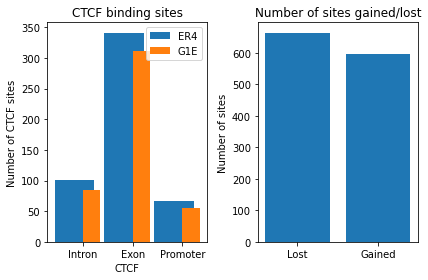

In [3]:
ctcflabels = ['Intron', 'Exon', 'Promoter']
gllabels = ['Lost', 'Gained']

x = np.arange(len(ctcflabels))
x2 = np.arange(len(gllabels))
width = 0.35

fig, (ax1,ax2) = plt.subplots(1, 2)
rects1 = ax1.bar(x - width/2, ER4, label = 'ER4')
rects2 = ax1.bar(x + width/2, G1E, width, label = 'G1E')

ax1.set_ylabel('Number of CTCF sites')
ax1.set_title('CTCF binding sites')
ax1.set_xlabel('CTCF')
ax1.set_xticks(x)
ax1.set_xticklabels(ctcflabels)
ax1.legend()


ax2.bar(x2, gl)
ax2.set_xticks(x2)
ax2.set_xticklabels(gllabels)
ax2.set_title('Number of sites gained/lost')
ax2.set_ylabel('Number of sites')

fig.tight_layout()
plt.show()


## Motif Discovery Command Line Commands

#!/bin/bash

#sort -r -k 9 CTCF_ER4_peaks.narrowPeak |head -n100 > CTCF_ER4_peaks_top100.txt

#bedtools getfasta -fi /Users/cmdb/qbb2020-answers/Assignment5-Chipseq/chr19.fa -bed CTCF_ER4_peaks_top100.txt > top_er4_peaks.fa

#meme-chip -meme-maxw 20 -oc meme_data top_er4_peaks.fa

#tomtom meme_data/combined.meme motif_databases/JASPAR/JASPAR_CORE_2016.meme


## Sequence logo plot

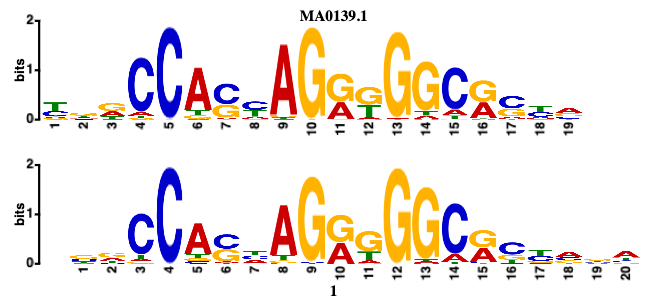